In [32]:
# project-1-deep-learning-image-classification-with-cnn

1. Picking a dataset

We pick dataset CIFAR-10 since we are already familiar with the data.

**2. Data Preprocessing**

In [33]:
clear_session()

In [48]:
# Importing libraries

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Rescaling
from keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras.optimizers import SGD
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [35]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [36]:
# Resizing the images of the dataset

'''
# Resize images to 128x128
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Check the new shape of the images
print(x_train_resized.shape)  # Should print (50000, 32, 32, 3)
print(x_test_resized.shape)   # Should print (10000, 32, 32, 3)
'''

'\n# Resize images to 128x128\nx_train_resized = tf.image.resize(x_train, [32, 32])\nx_test_resized = tf.image.resize(x_test, [32, 32])\n\n# Check the new shape of the images\nprint(x_train_resized.shape)  # Should print (50000, 32, 32, 3)\nprint(x_test_resized.shape)   # Should print (10000, 32, 32, 3)\n'

In [37]:
# Data augmentation to enlarge the dataset


In [38]:
# Normalize augmented images and x_test data

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [39]:
#one-hot encoding
'''
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)
'''


'\ny_train = to_categorical(y_train, num_classes=10)\ny_test = to_categorical(y_test, num_classes=10)\n\nprint(y_train.shape)\nprint(y_test.shape)\n'

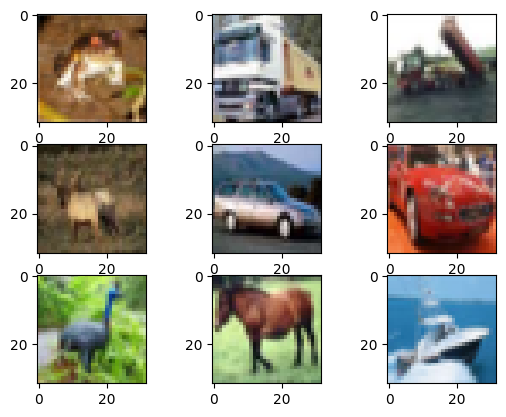

In [40]:
# Plot 9 images from the batch

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()


3. Model Architecture

In [41]:
# Building CNN model

model_simple = Sequential()

model_simple.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model_simple.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_simple.add(MaxPooling2D((2, 2)))

model_simple.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_simple.add(Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.001)))
model_simple.add(MaxPooling2D((2, 2)))

model_simple.add(Flatten())
model_simple.add(Dense(400, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_uniform'))
model_simple.add(Dropout(0.5))  # Dropout for regularization
model_simple.add(Dense(10, activation='softmax'))

4. Model Training

In [44]:
batch_size = 50
epochs = 100

optimizer = SGD(learning_rate=0.001, momentum=0.9)

model_simple.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss',   # Monitors the validation loss
                               patience=3,           # How many epochs to wait after no improvement
                               restore_best_weights=True)  # Restores the best weights

# Save the original model in a separate variable
trained_model = model_simple

# Train the model
history = model_simple.fit(x_train, y_train,
                    epochs=epochs,              # Number of epochs to train
                    batch_size=batch_size,          # Batch size
                    validation_data=(x_test, y_test),  # Validation data
                    callbacks=[early_stopping])  # Apply early stopping


Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.1944 - loss: 3.2488 - val_accuracy: 0.4040 - val_loss: 2.7262
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3893 - loss: 2.7460 - val_accuracy: 0.4647 - val_loss: 2.4970
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4549 - loss: 2.5340 - val_accuracy: 0.5142 - val_loss: 2.3650
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.4993 - loss: 2.3924 - val_accuracy: 0.5413 - val_loss: 2.2541
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5276 - loss: 2.2817 - val_accuracy: 0.5634 - val_loss: 2.1585
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5607 - loss: 2.1706 - val_accuracy: 0.5874 - val_loss: 2.0729
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5773 - loss: 2.0843 - val_accuracy: 0.6093 - val_loss: 1.9808
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6001 - loss: 

In [ ]:
# Save the model

# trained_model.save('model_cifar10.h5')

In [ ]:
# Load the saved model
# loaded_model = load_model('model_cifar10.h5')

5. Model Evaluation

In [47]:
# Calculate predicted values

y_pred_probs = model_simple.predict(x_test)

# Convert probabilities to class labels (integer values)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Print a few predicted values and their corresponding actual values
print("Predicted classes:", y_pred_classes[:10])
print("True labels:", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted classes: [3 8 8 0 4 6 1 6 3 1]
True labels: [[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


In [46]:
# Calculate Precision
precision = precision_score(y_test, y_pred_classes, average='weighted')

# Calculate Recall
recall = recall_score(y_test, y_pred_classes, average='weighted')

# Calculate F1 Score
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Precision: 0.7871
Recall: 0.7848
F1-score: 0.7853


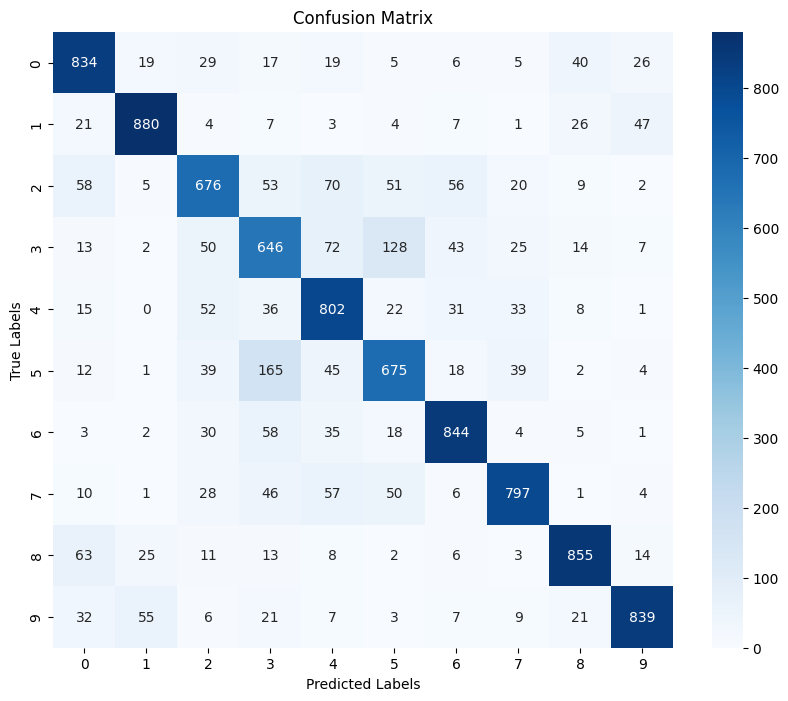

In [49]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Get true labels (from y_test, which should not be one-hot encoded)
# y_true = np.argmax(y_test, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]

print(misclassified_indices)

[   0    0    0 ... 9999 9999 9999]


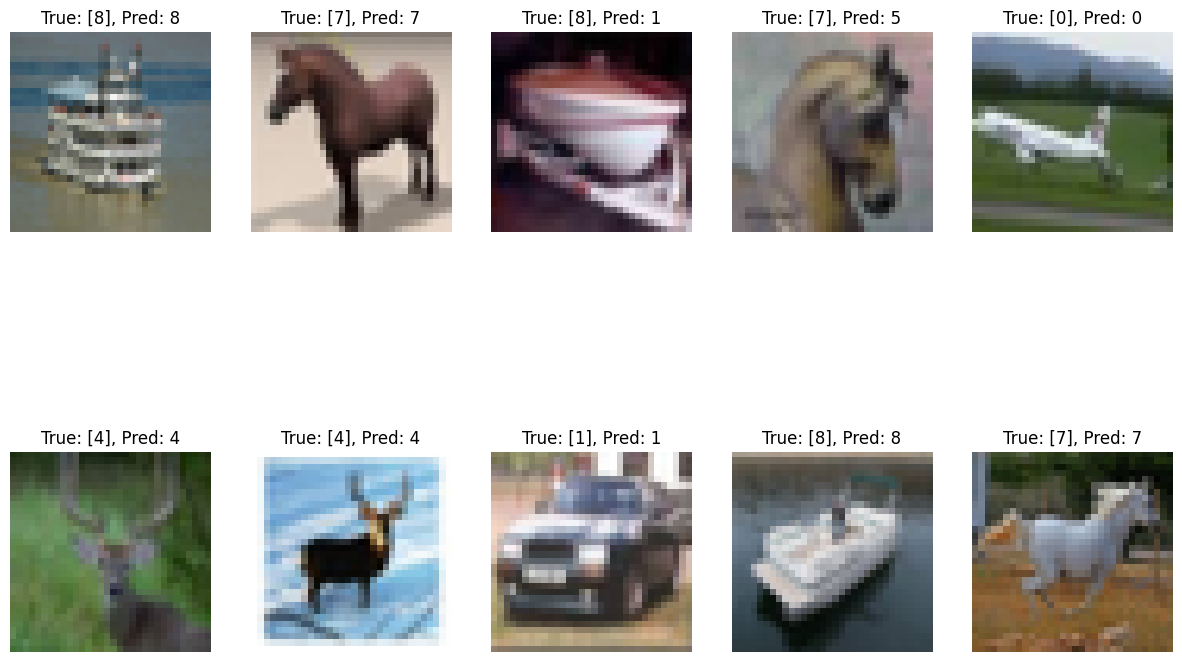

In [57]:
# Get true labels (from y_test, which should not be one-hot encoded)
# y_true = np.argmax(y_test, axis=1)

# Identify misclassified images
misclassified_indices = np.where(y_pred_classes != y_test)[0]

# Randomly sample 10 misclassified indices
sample_misclassified_indices = np.random.choice(misclassified_indices, 10, replace=False)

# Plot the misclassified images with their predicted and actual labels
plt.figure(figsize=(15, 10))
for i, idx in enumerate(sample_misclassified_indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.show()

6. Transfer Learning

7. Model deployment